In [19]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17652206925095410623
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16475670411208593958
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [21]:
!pip install tensorflow_text

     |████████████████████████████████| 4.6 MB 7.7 MB/s 
     |████████████████████████████████| 511.7 MB 4.2 kB/s 
     |████████████████████████████████| 1.6 MB 56.8 MB/s 
     |████████████████████████████████| 438 kB 64.8 MB/s 
     |████████████████████████████████| 5.8 MB 65.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers
  

In [1]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf

In [4]:
train_dataset = pd.read_csv("spam_ham_dataset.csv")
test_dataset = pd.read_csv("messages.csv",encoding='latin-1')
dataset_Assas = pd.read_csv("completeSpamAssassin.csv",encoding="latin-1")
dataset = pd.read_csv("spam_emails.csv",encoding="latin-1")

In [5]:
train_dataset.drop({'Unnamed: 0'},axis=1,inplace=True)
train_dataset.rename(columns={"text":"body"}, inplace=True)
train_dataset.drop({'label'}, axis = 1, inplace=True)
train_dataset

,body,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [6]:
test_dataset.drop({'subject'},axis=1,inplace=True)
test_dataset.rename(columns={"label":"label_num"}, inplace=True)
test_dataset.rename(columns={"message":"body"}, inplace=True)
test_dataset

,body,label_num
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0
...,...,...
2888,hello thanks for stopping by ! ! we have taken...,1
2889,"the list owner of : "" kiddin "" has invited you...",1
2890,"judging from the return post , i must have sou...",0
2891,gotcha ! there are two separate fallacies in t...,0


In [7]:
dataset_Assas.drop({'Unnamed: 0'},axis=1,inplace=True)

dataset_Assas.rename(columns={"Label":"label_num"}, inplace=True)
dataset_Assas.rename(columns={"Body":"body"}, inplace=True)
dataset_Assas

,body,label_num
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6041,empty,0
6042,___ ___ ...,0
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,empty,0


In [8]:
dataset.drop({'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'},axis=1,inplace=True)
dataset.rename(columns={"v2":"body"}, inplace=True)
dataset.rename(columns={"v1":"label_num"}, inplace=True)
#dataset

In [9]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
dataset['label_num']= label_encoder.fit_transform(dataset['label_num'])

dataset['label_num'].unique()

array([0, 1])

In [ ]:
#data.drop({'Unnamed: 0'},axis=1,inplace=True)

In [10]:
dataset = dataset.reindex(columns=['body','label_num'])
dataset

,body,label_num
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will Ì_ b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


In [11]:
print('dataset_Assas.shape: ', dataset_Assas.shape, '\tcolumns: ', dataset_Assas.columns)
print('dataset.shape: ', dataset.shape, '\tcolumns: ', dataset.columns)
print('test_dataset.shape: ', test_dataset.shape, '\tcolumns: ', test_dataset.columns)
print('train_dataset.shape: ', train_dataset.shape, '\tcolumns: ', train_dataset.columns)


dataset_Assas.shape:  (6046, 2) 	columns:  Index(['body', 'label_num'], dtype='object')
dataset.shape:  (5572, 2) 	columns:  Index(['body', 'label_num'], dtype='object')
test_dataset.shape:  (2893, 2) 	columns:  Index(['body', 'label_num'], dtype='object')
train_dataset.shape:  (5171, 2) 	columns:  Index(['body', 'label_num'], dtype='object')


In [12]:
df.drop({'label'}, axis=1, inplace=True)

NameError: ignored

In [ ]:
print('dataset: \n',dataset,'\n--------')
print('dataset_Assas: \n',dataset_Assas,'\n--------')
print('test_dataset: \n',test_dataset,'\n--------')
print('train_dataset: \n',train_dataset,'\n--------')



In [14]:
dataset_Assas

,body,label_num
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1
...,...,...
6041,empty,0
6042,___ ___ ...,0
6043,IN THIS ISSUE:01. Readers write\n02. Extension...,0
6044,empty,0


In [16]:
# data['label'].value_counts()

In [18]:
## 2 merged dataset (assassin & spam_ham)
import pandas as pd
xx = pd.read_csv('xx.csv')

In [19]:
# import the libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from  sklearn.model_selection import train_test_split

In [20]:
# X = xx['body']
# y = xx['label_num']

X=xx['body'].to_list()

y=xx['label_num'].to_list()


In [41]:
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y1 = label_encoder.fit_transform(xx['label_num'])

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y2 = y1.tolist()

In [60]:
# X_train, X_test,y_train,y_test = train_test_split(xx['body'],xx['label_num'],stratify = xx['label_num'] )
X_train, X_test,y_train,y_test = train_test_split(X, y2, test_size=0.33, random_state=42)


In [43]:
bert_preprocess = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")


In [44]:
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4",trainable=True)

### Sentence Encoding for some sentences
- This encoding are written by the pre trained BERT model

In [45]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences) 
    return bert_encoder(preprocessed_text)['pooled_output']
    

get_sentence_embeding(["500$ Discount.. hurry up",
                      "hey Lokesh, how are you?"])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7968771 , -0.4827034 , -0.8631371 , ..., -0.66486096,
        -0.72670215,  0.8877627 ],
       [-0.9108879 , -0.37098962, -0.9252513 , ..., -0.8426606 ,
        -0.69120616,  0.9014916 ]], dtype=float32)>

### Encoding for Some Words

In [46]:
e = get_sentence_embeding(["money","trust","email"])
print(e)

tf.Tensor(
[[-0.71963686 -0.12088943  0.6229348  ...  0.44747877 -0.4614834
   0.7860261 ]
 [-0.7741669  -0.11772463  0.5011415  ...  0.4684738  -0.5008097
   0.82592016]
 [-0.8740977  -0.30951107 -0.58097076 ... -0.26028302 -0.6191235
   0.9013735 ]], shape=(3, 768), dtype=float32)


In [61]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.98387206]], dtype=float32)

here we find that trust and money are closely related to each other

### Creating a Input Layer

In [62]:
# Bert Layer
text_input = tf.keras.layers.Input(shape = (),dtype = tf.string, name = "text")

preprocessed_text = bert_preprocess(text_input)

outputs= bert_encoder(preprocessed_text)
# Neural Network layer
l = tf.keras.layers.Dropout(0.1,name = 'dropout')(outputs['pooled_output'])

In [63]:
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [64]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_2 (KerasLayer)     {'input_type_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128)}                                                

In [65]:
len(X_train)

7516

In [66]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [67]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None,) <dtype: 'string'>
(None, 1) <dtype: 'float32'>
text [(None,)] string
keras_layer_2 None float32
keras_layer_3 {'input_type_ids': (None, 128), 'input_mask': (None, 128), 'input_word_ids': (None, 128)} float32
dropout (None, 768) float32
output (None, 768) float32


[None, None, None, None, None]

In [69]:
model.fit(X_train, y_train, epochs = 2)

Epoch 1/2
235/235 [==============================] - 207s 879ms/step - loss: 0.6413 - accuracy: 0.6828 - precision: 0.3250 - recall: 0.0579
Epoch 2/2
235/235 [==============================] - 206s 877ms/step - loss: 0.6427 - accuracy: 0.6771 - precision: 0.2611 - recall: 0.0446


In [70]:
model.evaluate(X_test, y_test)

116/116 [==============================] - 48s 406ms/step - loss: 0.6208 - accuracy: 0.6888 - precision: 0.0000e+00 - recall: 0.0000e+00


[0.6208162903785706, 0.6888168454170227, 0.0, 0.0]

In [71]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

116/116 [==============================] - 38s 323ms/step


In [72]:
import numpy as np
print('y_predicted: ', y_predicted)
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

y_predicted:  [0.2931882  0.29318827 0.29318827 ... 0.29318827 0.29318827 0.29318827]


array([0, 0, 0, ..., 0, 0, 0])

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[2550,    0],
       [1152,    0]])

Text(33.0, 0.5, 'Truth')

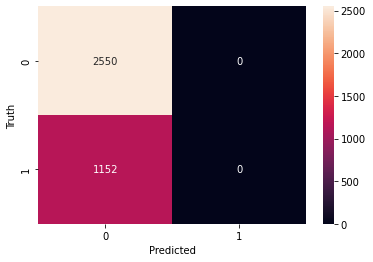

In [74]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      2550
           1       0.00      0.00      0.00      1152

    accuracy                           0.69      3702
   macro avg       0.34      0.50      0.41      3702
weighted avg       0.47      0.69      0.56      3702



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]
other = ['You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
         'Hey Sam, Are you coming for a cricket game tomorrow',
         'Help wanted.  We are a 14 year old fortune 500 company, that is growing at a tremendous rate.  We are looking for individuals who want to work from home.This is an opportunity to make an excellent income.  No experience is required.  We will train you.So if you are looking to be employed from home with a career that has vast opportunities, then go:http://www.basetel.com/wealthnowWe are looking for energetic and self motivated people.  If that is you than click on the link and fill out the form, and one of our employement specialist will contact you.To be removed from our link simple go to:http://www.basetel.com/remove.html',
         'Click Here Now ! Simply Amateur Just like the girl next door. XXX Free Tour !First time photos !Sneeky hidden cams !Nude exibitionists !Cheating Wives and Girlfriends !Click here to be removed']
output = model.predict(other)
print('output: ',output)
np.where(output > 0.5, 1, 0)

1/1 [==============================] - 0s 42ms/step
output:  [[0.29318827]
 [0.29318824]
 [0.2931882 ]
 [0.29318827]]


array([[0],
       [0],
       [0],
       [0]])